In [252]:
import pandas as pd
import numpy as np

from geopandas import GeoDataFrame
from shapely import wkt
from shapely.geometry import LineString, Polygon, Point

import matplotlib.pyplot as plt

In [253]:
elevation = geopandas.read_file('sf_contours.gpkg')
elevation.geometry

0        MULTILINESTRING ((-122.36531 37.72558, -122.36...
1        MULTILINESTRING ((-122.40341 37.70055, -122.40...
2        MULTILINESTRING ((-122.39484 37.70412, -122.39...
3        MULTILINESTRING ((-122.40476 37.74909, -122.40...
4        MULTILINESTRING ((-122.51467 37.77962, -122.51...
                               ...                        
14146    MULTILINESTRING ((-122.44805 37.75223, -122.44...
14147    MULTILINESTRING ((-122.44735 37.75248, -122.44...
14148    MULTILINESTRING ((-122.44793 37.75227, -122.44...
14149    MULTILINESTRING ((-122.46360 37.75368, -122.46...
14150    MULTILINESTRING ((-122.46301 37.75284, -122.46...
Name: geometry, Length: 14151, dtype: geometry

In [263]:
sf_census = pd.read_csv('sf polygons.csv')
sf_census = sf_census.set_index(sf_census['NAME'].astype(str))
sf_census['geometry'] = sf_census['geometry'].apply(wkt.loads)

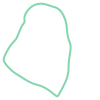

In [255]:
elevation.geometry[4]

In [256]:
#
list(elevation.geometry.apply(lambda line:[x.coords for x in line])[0])

In [257]:
elevation['points'] = elevation.geometry.apply(lambda y : [Point(x) for x in (y[0].coords)])

In [258]:
sum([(sf_census['geometry'][0]).contains(elevation['points'][0][i]) for i in range(len(elevation['points'][0]))])

0

In [259]:
def check_contains(poly,points):
    sums = sum([poly.contains(points[i])for i in range(len(points))])
    return bool(sums)

In [276]:
def get_avg_elevation(sf_idx):
    res_0 = []
    for i in range(len(elevation)):
        if check_contains(sf_census['geometry'][sf_idx],elevation['points'][sf_idx][i]):
            res_0+=[i]
        
    eles = elevation.iloc[res_0]['elevation']
    return np.mean(lmao)

In [278]:
# get the average elevation
sf_census = sf_census.set_index(sf_census['name'].apply(lambda x: x.replace('a','')))
check_contains(sf_census.geometry[5],elevation['points'][0])

False

In [282]:
elevation.points

0        [POINT (-122.365312222365 37.72557844357855), ...
1        [POINT (-122.403408668263 37.70054879885006), ...
2        [POINT (-122.3948404745151 37.70411863272767),...
3        [POINT (-122.4047646951539 37.74908696884473),...
4        [POINT (-122.5146700919496 37.77962344514351),...
                               ...                        
14146    [POINT (-122.4480489469723 37.75222717761899),...
14147    [POINT (-122.4473464903071 37.75247500077768),...
14148    [POINT (-122.4479342591019 37.75226808225273),...
14149    [POINT (-122.4636038698986 37.75367518998301),...
14150    [POINT (-122.4630065243303 37.75284272886329),...
Name: points, Length: 14151, dtype: object

In [306]:
def get_max_elev(geometry):
    res_0 = []
    for i in range(len(elevation)):
        if check_contains(geometry,elevation['points'][i]):
            res_0+=[i]
    maximum = np.max(elevation.iloc[res_0]['elevation'])
    return maximum

In [310]:
max_elev = sf_census['geometry'].apply(get_max_elev)

In [318]:
sf_census['max elevation']=max_elev
sf_census.to_csv('elevation.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([31., 33., 48., 40., 17., 11.,  4.,  4.,  3.,  4.]),
 array([ 20. , 109.5, 199. , 288.5, 378. , 467.5, 557. , 646.5, 736. ,
        825.5, 915. ]),
 <a list of 10 Patch objects>)

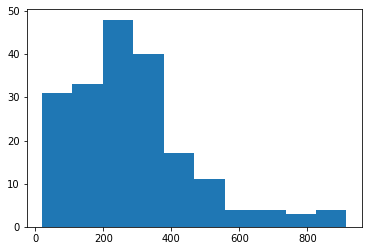

In [321]:
plt.hist(sf_census['max elevation'])